In [ ]:
pip install pycaret[full]

     |████████████████████████████████| 266 kB 5.5 MB/s 
     |████████████████████████████████| 1.7 MB 32.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 35.4 MB/s 
     |████████████████████████████████| 167 kB 52.5 MB/s 
     |████████████████████████████████| 2.0 MB 38.0 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
     |████████████████████████████████| 271 kB 54.1 MB/s 
     |████████████████████████████████| 111 kB 48.3 MB/s 
     |████████████████████████████████| 14.6 MB 127 kB/s 
     |████████████████████████████████| 80 kB 9.6 MB/s 
     |████████████████████████████████| 1.3 MB 34.4 MB/s 
     |████████████████████████████████| 261 kB 48.8 MB/s 
     |████████████████████████████████| 54.0 MB 41 kB/s 
     |████████████████████████████████| 40 kB 6.1 MB/s 
     |█████████████████████

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import datatable as dt

import os
import sys

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir("drive/MyDrive/bioage")

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
df=pd.read_csv("data/checkup_open_data_concat.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (27,30,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  return eval(expr, self.user_global_ns, self.user_ns)


In [ ]:
df.drop(["Unnamed: 0","가입자일련번호","구강검진수검여부","치아우식증유무","결손치유무","치아마모증유무","제3대구치(사랑니)이상","치석","데이터공개일자"],axis=1,inplace=True)

# Preprocessing

## Rename columns

In [ ]:
df.columns

Index(['기준년도', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부'], dtype='object')

In [ ]:
df=df.rename(columns = {
    '기준년도':'year',
    "시도코드":'province',
    '성별코드': 'gender', 
'연령대코드(5세단위)': 'age',
 '청력(좌)': 'ear-1', 
 '청력(우)': 'ear-2', 
 '신장(5Cm단위)': 'height', 
 '체중(5Kg단위)': 'weight', 
 '허리둘레': 'waist', 
 '시력(좌)': 'eye-1', 
 '시력(우)': 'eye-2', 
 '수축기혈압': 'sbp', 
 '이완기혈압': 'dbp',
'식전혈당(공복혈당)': 'glucose',
 '총콜레스테롤': 'total_chol',
  'HDL콜레스테롤': 'hdl_chol', 
  '트리글리세라이드': 'trigli',
   'LDL콜레스테롤': 'ldl_chol',
    '(혈청지오티)AST': 'ast',
    "(혈청지오티)ALT" :"alt",
    '감마지티피': 'gtp', 
    '혈색소': 'hemo', 
    '요단백': 'u_protein', 
     '혈청크레아티닌': 'creatinine',
     "흡연상태" : "smoke",
     "음주여부":"drink"})

## Dealing with null values

In [ ]:
df.isnull().sum()

year                0
province            0
gender              0
age                 0
height            897
weight            897
waist            1276
eye-1            1075
eye-2            1097
ear-1             935
ear-2             936
sbp             11261
dbp             11262
glucose         11528
total_chol    1333781
trigli        1333797
hdl_chol      1333804
ldl_chol      1355706
hemo            11551
u_protein       34911
creatinine      11520
ast             11511
alt             11514
gtp             11524
smoke            1158
drink         1711397
dtype: int64

In [ ]:
df=df.dropna().reset_index(drop=True)

In [ ]:
df.isnull().sum()

year          0
province      0
gender        0
age           0
height        0
weight        0
waist         0
eye-1         0
eye-2         0
ear-1         0
ear-2         0
sbp           0
dbp           0
glucose       0
total_chol    0
trigli        0
hdl_chol      0
ldl_chol      0
hemo          0
u_protein     0
creatinine    0
ast           0
alt           0
gtp           0
smoke         0
drink         0
dtype: int64

In [ ]:
# check the gender distribution after removing null values

df['gender'].value_counts()

1    1326522
2    1047405
Name: gender, dtype: int64

## Dealing with categorical values

In [ ]:
# 음주여부 값 수정

df["drink"].unique()

array([1.0, 0.0, '1.0', 'Y', 'N'], dtype=object)

In [ ]:
df.iloc[df[df['drink']=="1.0"].index,-1]=1.0
df.iloc[df[df['drink']=="Y"].index,-1]=1.0
df.iloc[df[df['drink']=="N"].index,-1]=0.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373927 entries, 0 to 2373926
Data columns (total 26 columns):
 #   Column      Dtype  
---  ------      -----  
 0   year        int64  
 1   province    int64  
 2   gender      int64  
 3   age         int64  
 4   height      float64
 5   weight      float64
 6   waist       float64
 7   eye-1       float64
 8   eye-2       float64
 9   ear-1       float64
 10  ear-2       float64
 11  sbp         float64
 12  dbp         float64
 13  glucose     float64
 14  total_chol  float64
 15  trigli      float64
 16  hdl_chol    float64
 17  ldl_chol    float64
 18  hemo        float64
 19  u_protein   float64
 20  creatinine  float64
 21  ast         float64
 22  alt         float64
 23  gtp         float64
 24  smoke       float64
 25  drink       object 
dtypes: float64(21), int64(4), object(1)
memory usage: 470.9+ MB


In [ ]:
df["drink"].value_counts()

1.0    1382380
0.0     991547
Name: drink, dtype: int64

In [ ]:
df['drink']=df['drink'].astype("int64")

In [ ]:
# df.drop(['smoke','drink'],axis=1,inplace=True)

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373927 entries, 0 to 2373926
Data columns (total 26 columns):
 #   Column      Dtype  
---  ------      -----  
 0   year        int64  
 1   province    int64  
 2   gender      int64  
 3   age         int64  
 4   height      float64
 5   weight      float64
 6   waist       float64
 7   eye-1       float64
 8   eye-2       float64
 9   ear-1       float64
 10  ear-2       float64
 11  sbp         float64
 12  dbp         float64
 13  glucose     float64
 14  total_chol  float64
 15  trigli      float64
 16  hdl_chol    float64
 17  ldl_chol    float64
 18  hemo        float64
 19  u_protein   float64
 20  creatinine  float64
 21  ast         float64
 22  alt         float64
 23  gtp         float64
 24  smoke       float64
 25  drink       int64  
dtypes: float64(21), int64(5)
memory usage: 470.9 MB


In [ ]:
df.describe()

,year,province,gender,age,height,weight,waist,eye-1,eye-2,ear-1,ear-2,sbp,dbp,glucose,total_chol,trigli,hdl_chol,ldl_chol,hemo,u_protein,creatinine,ast,alt,gtp,smoke,drink
count,2.373927e+06,2.373927e+06,2.373927e+06,2.373927e+06,2.373927e+06,2.373927e+06,2.373927e+06,2.373927e+06,2.373927e+06,2.373927e+06,2.373927e+06,2.373927e+06,2.373927e+06,2.373927e+06,2.373927e+06,2.373927e+06,2.373927e+06,2.373927e+06,2.373927e+06,2.373927e+06,2.373927e+06,2.373927e+06,2.373927e+06,2.373927e+06,2.373927e+06,2.373927e+06
mean,2.016413e+03,3.356040e+01,1.441212e+00,1.046323e+01,1.643669e+02,6.530900e+01,8.133077e+01,9.853642e-01,9.829788e-01,1.029960e+00,1.028759e+00,1.224359e+02,7.614515e+01,1.002268e+02,1.954837e+02,1.301989e+02,5.659590e+01,1.135157e+02,1.425194e+01,1.091939e+00,8.717759e-01,2.609306e+01,2.599098e+01,3.811506e+01,1.618035e+00,5.823178e-01
std,1.318195e+00,1.272558e+01,4.965320e-01,2.776081e+00,9.410064e+00,1.256803e+01,1.052914e+01,6.069719e-01,6.039362e-01,1.704760e-01,1.671288e-01,1.445593e+01,9.882550e+00,2.392765e+01,3.819013e+01,9.210120e+01,1.640573e+01,3.630536e+01,1.608011e+00,4.313277e-01,5.102085e-01,2.118195e+01,2.465115e+01,5.119051e+01,8.030374e-01,4.931773e-01
min,2.015000e+03,1.100000e+01,1.000000e+00,5.000000e+00,1.300000e+02,2.500000e+01,1.000000e+00,1.000000e-01,1.000000e-01,1.000000e+00,1.000000e+00,6.300000e+01,3.000000e+01,1.400000e+01,3.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e-01,1.000000e+00,6.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.015000e+03,2.600000e+01,1.000000e+00,9.000000e+00,1.600000e+02,5.500000e+01,7.500000e+01,7.000000e-01,7.000000e-01,1.000000e+00,1.000000e+00,1.120000e+02,7.000000e+01,8.800000e+01,1.690000e+02,7.300000e+01,4.600000e+01,9.000000e+01,1.320000e+01,1.000000e+00,7.000000e-01,1.900000e+01,1.500000e+01,1.600000e+01,1.000000e+00,0.000000e+00
50%,2.017000e+03,4.100000e+01,1.000000e+00,1.000000e+01,1.650000e+02,6.500000e+01,8.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.200000e+02,7.600000e+01,9.600000e+01,1.930000e+02,1.060000e+02,5.500000e+01,1.120000e+02,1.430000e+01,1.000000e+00,9.000000e-01,2.300000e+01,2.000000e+01,2.400000e+01,1.000000e+00,1.000000e+00
75%,2.017000e+03,4.300000e+01,2.000000e+00,1.200000e+01,1.700000e+02,7.500000e+01,8.800000e+01,1.200000e+00,1.200000e+00,1.000000e+00,1.000000e+00,1.300000e+02,8.100000e+01,1.050000e+02,2.190000e+02,1.590000e+02,6.500000e+01,1.350000e+02,1.540000e+01,1.000000e+00,1.000000e+00,2.900000e+01,3.000000e+01,4.100000e+01,2.000000e+00,1.000000e+00
max,2.019000e+03,5.000000e+01,2.000000e+00,1.800000e+01,2.000000e+02,1.450000e+02,9.990000e+02,9.900000e+00,9.900000e+00,2.000000e+00,2.000000e+00,2.730000e+02,1.850000e+02,9.720000e+02,2.389000e+03,9.490000e+03,8.110000e+03,9.999000e+03,2.500000e+01,6.000000e+00,9.900000e+01,9.999000e+03,7.210000e+03,9.990000e+02,3.000000e+00,1.000000e+00


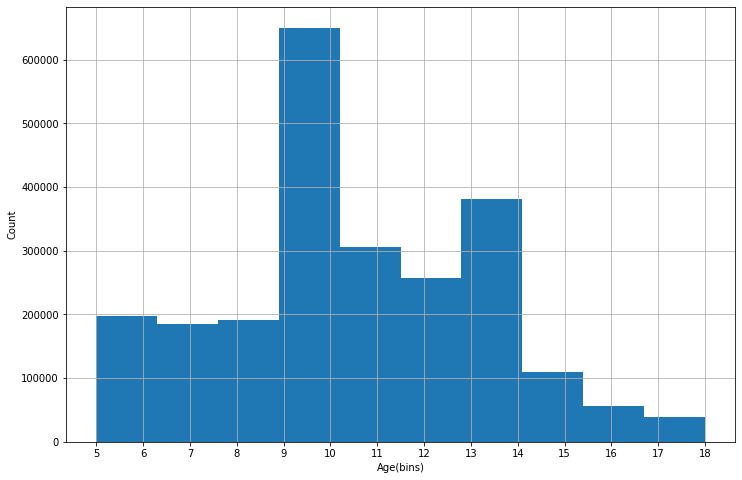

In [ ]:
# 연령 히스토그램
plt.figure(figsize=(12,8))
plt.hist(df['age'])
plt.grid()
plt.xlabel("Age(bins)")
plt.xticks(np.arange(5,19))
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'gender')

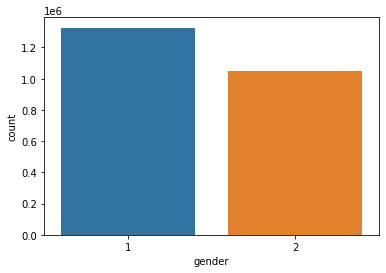

In [ ]:
# 성별분포

sns.countplot(df['gender'])
plt.xlabel("gender")

In [ ]:
df['gender'].value_counts()

1    1326522
2    1047405
Name: gender, dtype: int64

Text(0.5, 0, 'Age groups')

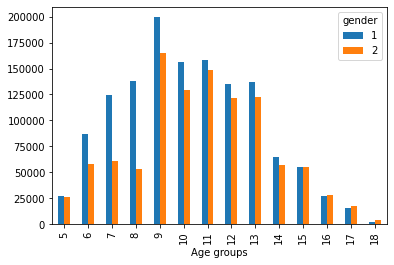

In [ ]:
# 성별 나이 분포

gender_counts=df.groupby(['age','gender']).age.count().unstack()

gender_counts.plot(kind='bar',stacked=False)
plt.xlabel('Age groups')

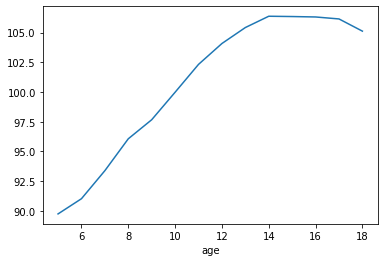

In [ ]:
# 공복혈당 분포

# 나이대별 공복혈당 (평균)
df.groupby(['age'])['glucose'].mean().plot()

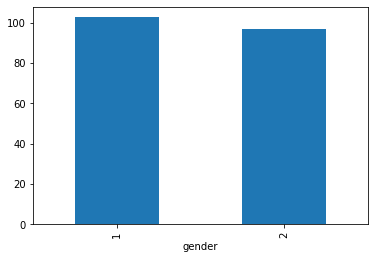

In [ ]:
# 성별 공복혈당 (평균)

df.groupby(['gender'])['glucose'].mean().plot(kind="bar")

In [ ]:
# # 나이대별 흡연상태, 음주상태 분포

# df.groupby(['age','흡연상태'])['age'].count().unstack().plot()
# df.groupby(['age','음주여부'])['age'].count().unstack().plot()

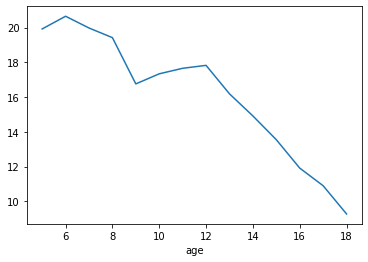

In [ ]:
#나이대별 요단백 분포 
# 1.0 = 음성, 2.0~6.0 = 미량 또는 양성
#ratio : 음성과 그 외의 항목들간의 비율

upro=df.groupby(['age','u_protein'])['u_protein'].count().unstack()
upro['ratio']=upro[1.0]/(upro[2.0]+upro[3.0]+upro[4.0]+upro[5.0]+upro[6.0])
upro.ratio.plot()

## 공복혈당과의 상관관계

In [ ]:
corr=df.corr()
corr_dict=corr.to_dict()

In [ ]:
glucose_corr=corr_dict['glucose']

In [ ]:
glucose_corr.pop('glucose')

1.0

Text(0, 0.5, 'Corr')

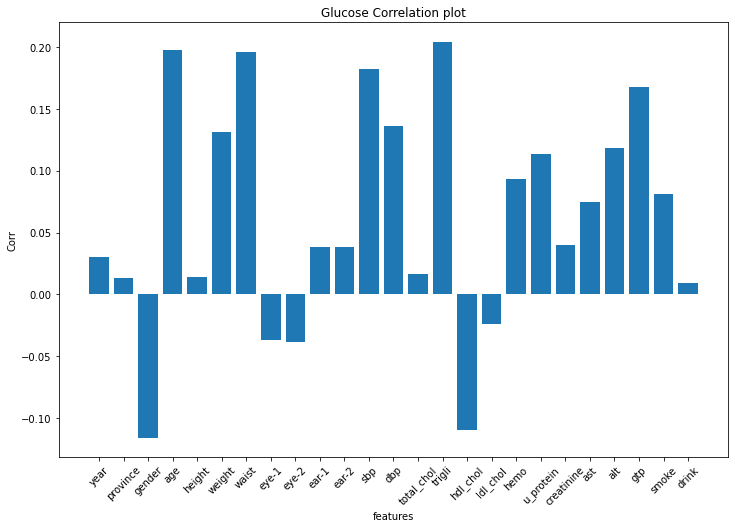

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(glucose_corr.keys(),glucose_corr.values())
plt.xticks(rotation=45)
plt.title("Glucose Correlation plot")
plt.xlabel("features")
plt.ylabel("Corr")

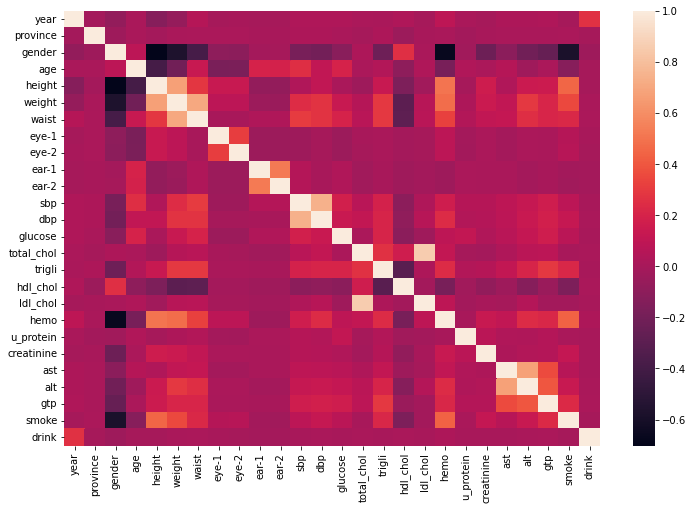

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr)

# Feature Engineering

In [ ]:
from copy import deepcopy

orignal_df=deepcopy(df)

## Feauture selection 


- 공복혈당과의 상관관계가 매우 낮거나, 예측에 사용하지 않을 feature 제거

In [ ]:
remove_cols=["year",'province','height','ear-1','ear-2','eye-1','eye-2','total_chol','ldl_chol','creatinine','drink']

df=df.drop(remove_cols,axis=1)

## Removing outliers

In [ ]:
def get_outlier(df_in, col_name,weight=1.5):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-weight*iqr
    fence_high = q3+weight*iqr
    outlier_idx = df_in[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)].index
    return outlier_idx

In [ ]:
numeric_cols=[]
object_cols=[]

for col,type in zip(df.columns,df.dtypes):
  if type=="float64":
    numeric_cols.append(col)

  elif type=="int64":
    continue

  else:
    object_cols.append(col)

# numeric_cols.remove('T001050-1')
# numeric_cols.remove('T001050-2')
# numeric_cols.remove('T001070')



In [ ]:
outliers=[]

for col in numeric_cols[1:]:
  idx_list=get_outlier(df,col,weight=1.5).tolist()
  outliers.extend(idx_list)


outliers=set(outliers)
print(len(outliers))

710195


In [ ]:
df=df.drop(outliers,axis=0)

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
df.shape

(1663732, 15)

In [ ]:
df['age']=df['age'].astype("float64")
df['smoke']=df['smoke'].astype("int64")

# Modeling

In [ ]:
# train_test_split

final_df=deepcopy(df)

train_size=0.98

idx=np.random.permutation(final_df.shape[0])
train_idx=idx[:int(final_df.shape[0]*train_size)]
test_idx=idx[int(final_df.shape[0]*train_size):]

train_df=final_df.iloc[train_idx]
test_df=final_df.iloc[test_idx]

In [ ]:
test_df.shape

(33275, 15)

In [ ]:
from pycaret.regression import *
# from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
train_df

,gender,age,weight,waist,sbp,dbp,glucose,trigli,hdl_chol,hemo,u_protein,ast,alt,gtp,smoke
1107758,2,8.0,70.0,85.0,100.0,64.0,96.0,114.0,57.0,11.5,1.0,13.0,15.0,16.0,1
136216,2,6.0,55.0,66.0,100.0,60.0,81.0,60.0,57.0,14.2,1.0,27.0,22.0,53.0,3
376140,1,8.0,85.0,82.0,123.0,79.0,106.0,201.0,60.0,14.9,1.0,22.0,21.0,25.0,1
1168221,2,10.0,55.0,80.0,115.0,84.0,105.0,106.0,62.0,13.9,1.0,18.0,12.0,20.0,1
345203,1,13.0,55.0,100.0,130.0,90.0,106.0,189.0,45.0,11.7,1.0,14.0,16.0,17.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387614,1,11.0,75.0,73.0,117.0,69.0,91.0,86.0,58.0,15.4,1.0,17.0,16.0,21.0,2
1544939,2,10.0,45.0,68.0,127.0,75.0,91.0,163.0,51.0,12.7,1.0,22.0,13.0,19.0,1
406045,1,10.0,60.0,75.0,120.0,68.0,91.0,38.0,51.0,14.7,1.0,19.0,16.0,9.0,1
12401,1,6.0,60.0,80.0,109.0,67.0,108.0,157.0,49.0,15.0,1.0,16.0,10.0,17.0,2


In [ ]:
final_df.dtypes

gender         int64
age          float64
weight       float64
waist        float64
sbp          float64
dbp          float64
glucose      float64
trigli       float64
hdl_chol     float64
hemo         float64
u_protein    float64
ast          float64
alt          float64
gtp          float64
smoke          int64
dtype: object

In [ ]:
reg_setup=setup(data=train_df,target='glucose',train_size=0.95,normalize=True,categorical_features=['gender','smoke'])

,Description,Value
0,session_id,5004
1,Target,glucose
2,Original Data,"(1630457, 15)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1548934, 16)"


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
top_models=compare_models(cross_validation=False,
                          include=["lr","lasso","ridge","lightgbm",'catboost','xgboost'],
                          turbo=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,8.1619,110.4908,10.5115,0.1342,0.1088,0.0868,196.38
lightgbm,Light Gradient Boosting Machine,8.1673,110.6545,10.5192,0.1330,0.1089,0.0869,14.00
xgboost,Extreme Gradient Boosting,8.1749,110.8374,10.5279,0.1315,0.1090,0.0869,170.48
lr,Linear Regression,8.2115,111.8749,10.5771,0.1234,0.1095,0.0873,0.53
ridge,Ridge Regression,8.2115,111.8749,10.5771,0.1234,0.1095,0.0873,0.82
lasso,Lasso Regression,8.3344,115.4094,10.7429,0.0957,0.1112,0.0887,0.31


In [ ]:
top_models

# Evaluation

In [ ]:
# Mean Absolute Error

def MAE(df,col1,col2):
  return np.array(abs(df[col1]-df[col2])).mean()

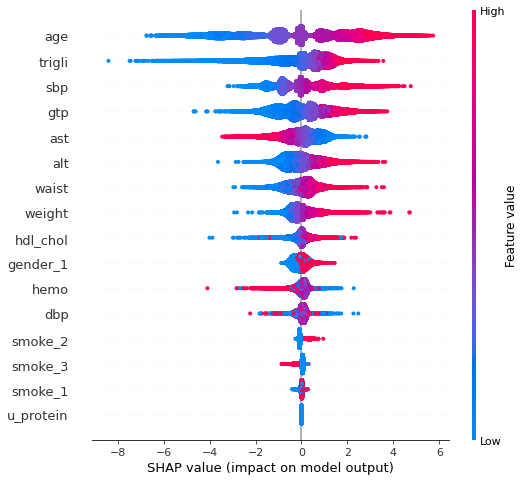

In [ ]:
interpret_model(top_models)

In [ ]:
features=train_df.drop("glucose",axis=1).columns

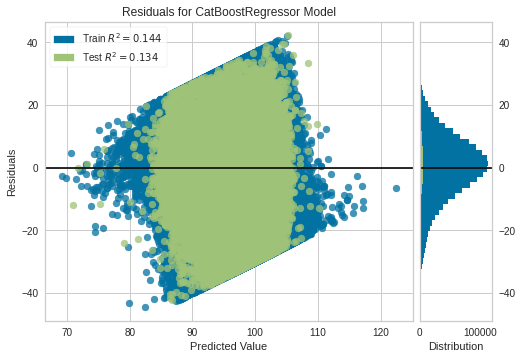

In [ ]:
plot_model(top_models,plot="residuals")

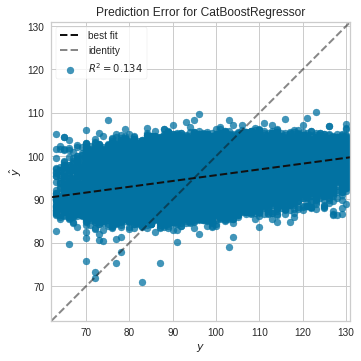

In [ ]:
plot_model(top_models, plot='error')

In [ ]:
cb_predict=predict_model(top_models,test_df)

In [ ]:
cb_predict.sample(20)

,gender,age,weight,waist,sbp,dbp,glucose,trigli,hdl_chol,hemo,u_protein,ast,alt,gtp,smoke,Label
423555,1,16.0,85.0,103.0,110.0,60.0,127.0,150.0,50.0,14.6,1.0,22.0,21.0,52.0,1,103.509706
775452,1,13.0,70.0,93.0,117.0,71.0,119.0,66.0,48.0,15.5,1.0,26.0,28.0,34.0,3,98.636676
306312,1,12.0,55.0,72.0,102.0,64.0,93.0,88.0,64.0,14.9,1.0,29.0,18.0,18.0,3,92.624913
684850,1,11.0,75.0,90.0,130.0,80.0,100.0,106.0,46.0,15.4,1.0,24.0,14.0,37.0,3,98.000752
905968,2,7.0,55.0,70.0,100.0,60.0,95.0,95.0,74.0,15.5,1.0,15.0,15.0,16.0,1,90.482610
214706,2,7.0,65.0,81.0,115.0,75.0,84.0,130.0,72.0,11.6,1.0,21.0,20.0,14.0,1,89.784302
1356362,1,14.0,65.0,89.0,127.0,79.0,128.0,145.0,49.0,13.9,1.0,16.0,15.0,26.0,2,101.018908
201344,2,6.0,75.0,75.0,129.0,75.0,84.0,73.0,54.0,14.4,1.0,23.0,32.0,21.0,1,92.751130
144872,1,6.0,70.0,77.0,115.0,70.0,75.0,87.0,49.0,15.4,1.0,14.0,11.0,16.0,1,90.879404
618733,1,6.0,95.0,89.0,135.0,89.0,98.0,116.0,37.0,16.1,1.0,26.0,41.0,17.0,1,92.974009


In [ ]:
MAE(cb_predict,"glucose","Label")

8.14673006254701

In [ ]:
save_model(top_models,"cb_glucose")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['gender', 'smoke'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='glucose',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,...
                 ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='glucose')),
                 ('fix_perfect', Remove_100(target='glucose')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
        